# Задание

### Основная часть

* Проанализируйте и опишите данный датасет, используя все возможные графики из тех, что были на уроке Matplotlib, Seaborn, Plotly
* Используйте также описательные статистики
* У каждого построенного графика должен быть соответствующий вывод, который описывает наблюдение или инсайт

# Описания полей

* age	возраст
* gender	пол repexc_date
* city_type	Тип города проживания клиента
* full_mob	Длительность взаимоотношений с банком

* ml_balance	ипотека
* cl_balance_0m	потребительский кредит
* loan_balance_0m	все кредиты

* td_balance_0m	депозит
* casa_balance_0m	счета

* dc_trx_cnt	количество трат по картам
* dc_trx_sum	сумма трат по картам
* Avg_trx	средний размер транзакции
* avgtrx_to_balance	


* min_casa_balance_1q	показатели по счетам за квартал
* max_casa_balance_1q	
* avg_casa_balance_1Y	показатели по счетам за год

* min_td_balance_1q	
* max_td_balance_1q	
* avg_td_balance_1Y

* min_loan_balance_1q	
* max_loan_balance_1q	
* avg_loan_balance_1Y

* min_cl_balance_1q	
* max_cl_balance_1q	
* avg_cl_balance_1Y	
* loan_to_deposit	

* income	доход клиента
* nbi	доход от клиента без OPEX

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from tqdm.auto import tqdm

In [2]:
df = pd.read_csv('test_cluster.csv', encoding='cp1251', sep=';')
df.head()

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,...,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi
0,71,NaN,<100,103,0.0,0.0,0.0,0.0,0.0000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,49,NaN,Mega,81,0.0,0.0,0.0,0.0,3272.9367,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,28.762952
2,56,NaN,Mega,81,0.0,0.0,0.0,0.0,6249.7550,6,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,854.67,0.083467,1973.335539
3,47,NaN,Mega,81,0.0,0.0,0.0,0.0,14354.9370,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,364.008556
4,74,NaN,Mega,81,0.0,0.0,0.0,0.0,91511.7691,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,6651.416562


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  50000 non-null  int64  
 1   gender               49277 non-null  object 
 2   city_type            50000 non-null  object 
 3   full_mob             50000 non-null  int64  
 4   ml_balance           50000 non-null  float64
 5   cl_balance_0m        50000 non-null  float64
 6   loan_balance_0m      50000 non-null  float64
 7   td_balance_0m        50000 non-null  float64
 8   casa_balance_0m      50000 non-null  float64
 9   dc_trx_cnt           50000 non-null  int64  
 10  dc_trx_sum           50000 non-null  float64
 11  income               50000 non-null  float64
 12  min_casa_balance_1q  50000 non-null  float64
 13  max_casa_balance_1q  50000 non-null  float64
 14  avg_casa_balance_1Y  50000 non-null  float64
 15  min_td_balance_1q    50000 non-null 

Text(0.5, 1.0, 'Распределение клиентов по численности городов:')

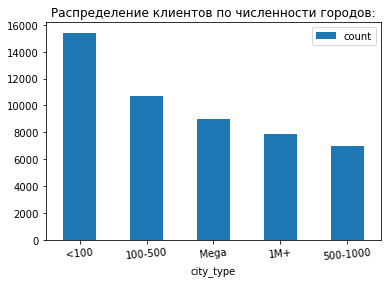

In [4]:

df = pd.read_csv('test_cluster.csv', encoding='cp1251', sep=';')
df_city = df.groupby('city_type').size().reset_index(name='count').sort_values(by='count', ascending=False).head()
df_city.plot(x="city_type", y="count", kind="bar", rot=5, fontsize=10)

plt.title('Распределение клиентов по численности городов:')

In [5]:
df = pd.read_csv('test_cluster.csv', encoding='cp1251', sep=';')
age_min = df['age'].min()
age_max = df['age'].max()

Text(0.5, 1.0, 'Распределение клиентов по возрасту:')

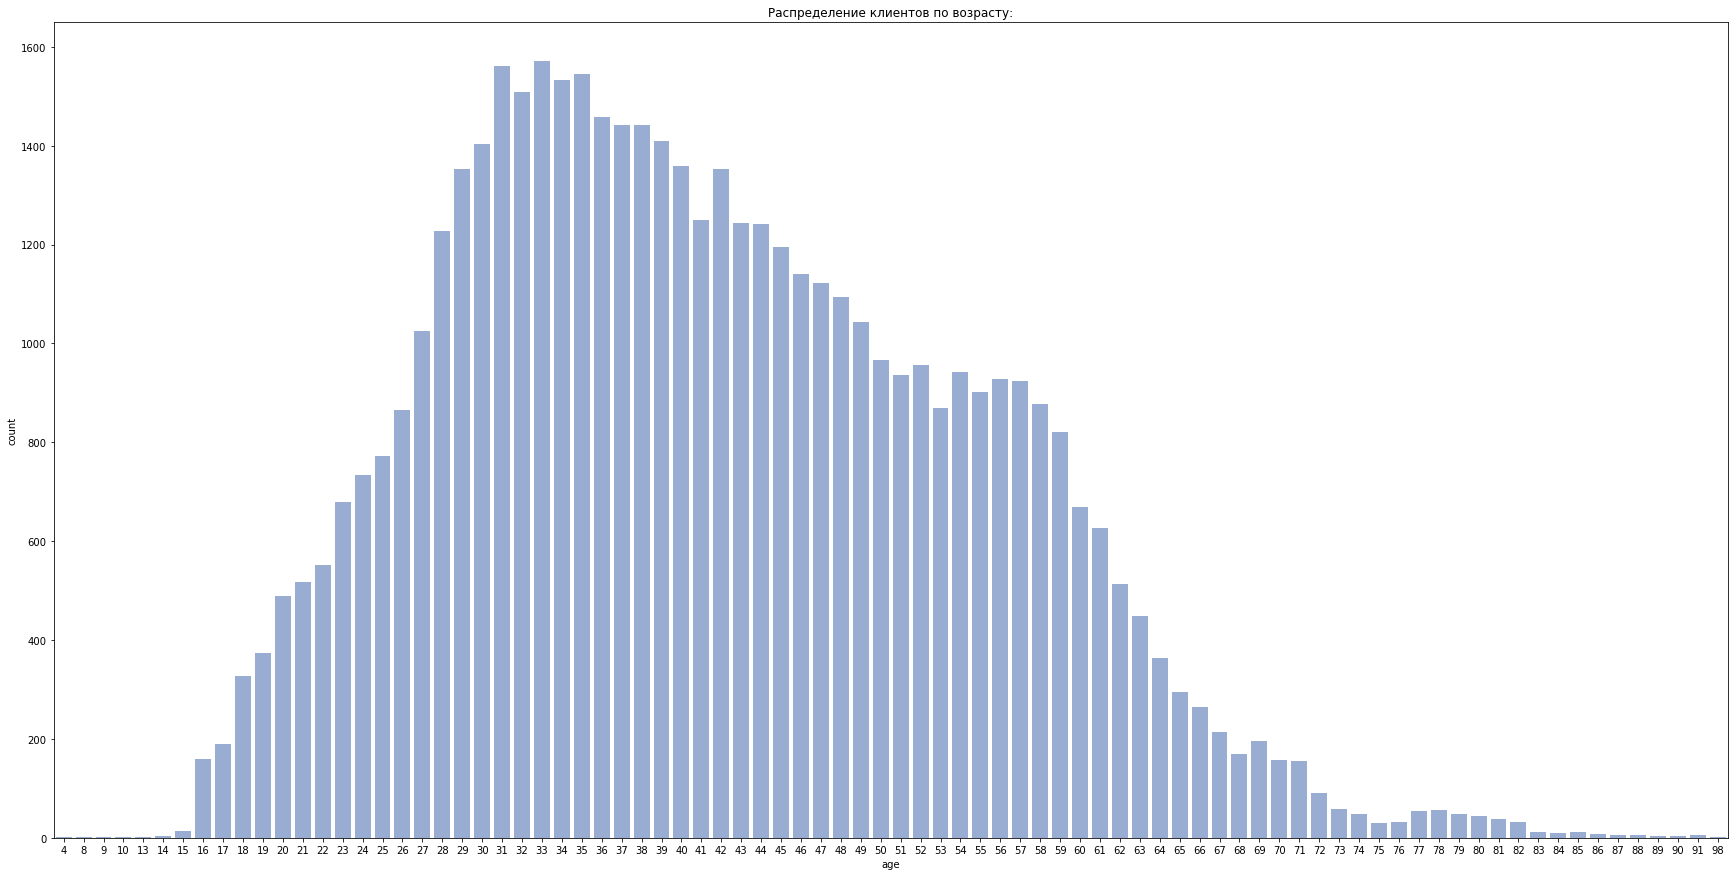

In [6]:
from pylab import rcParams
rcParams['figure.figsize'] = 30,15
df = pd.read_csv('test_cluster.csv', encoding ='cp1251', sep=';')
sns.countplot(x = 'age', data = df, palette = ['#8FAADC'])
plt.title('Распределение клиентов по возрасту:')

Text(0.5, 1.0, 'Кол-во клиентов по полу:')

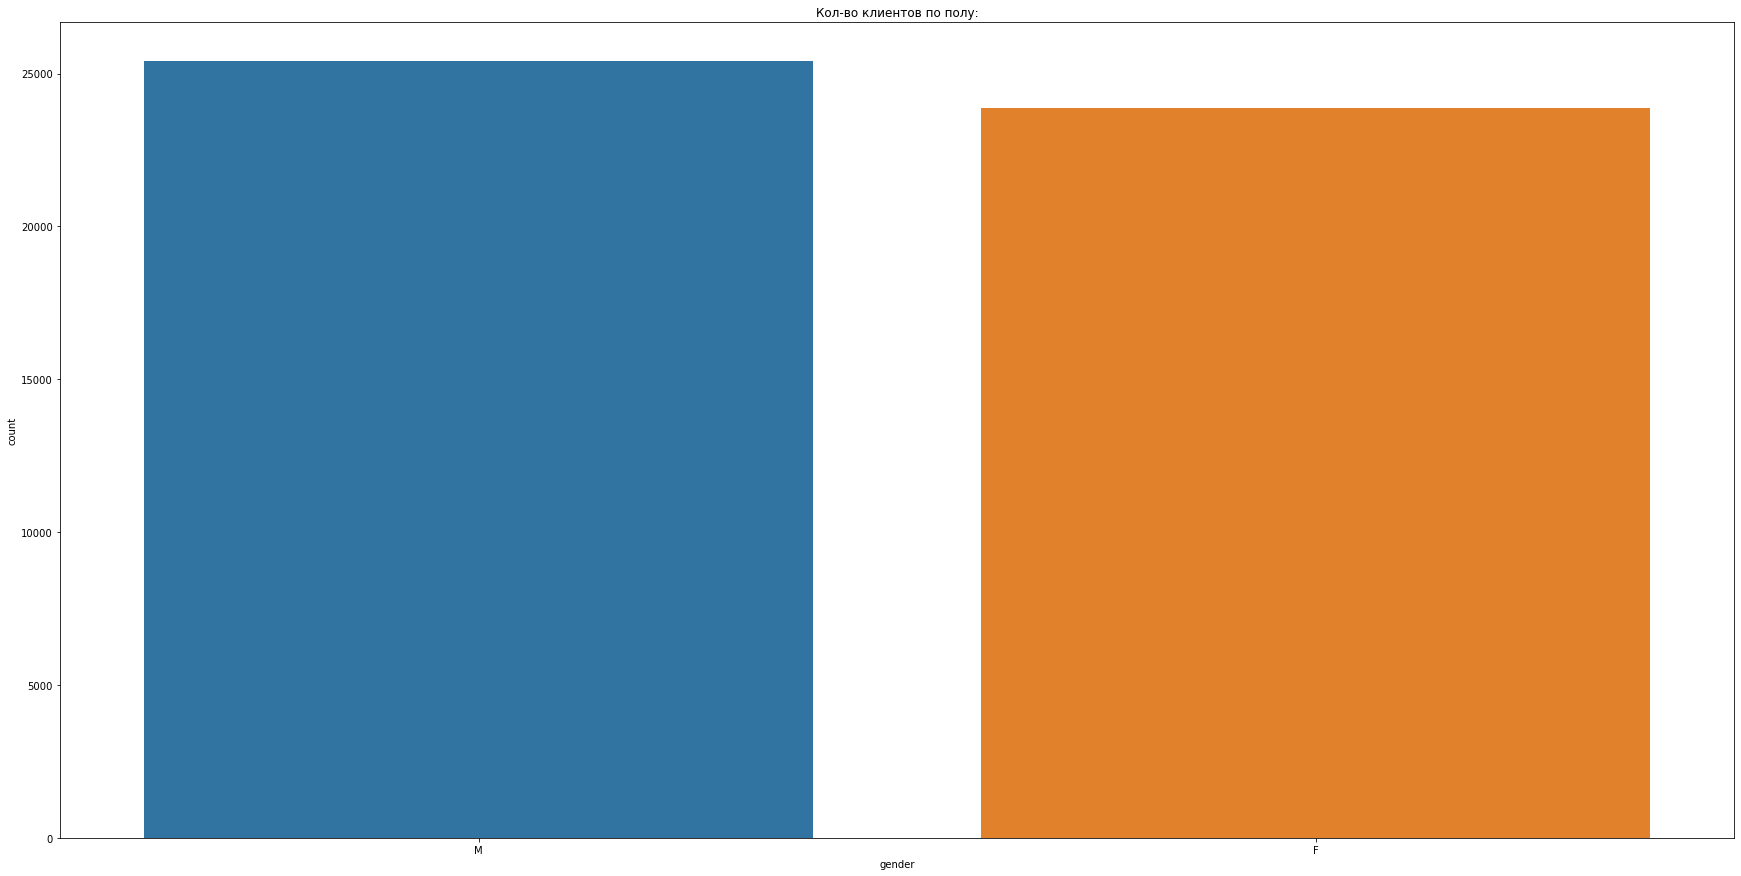

In [7]:
df = pd.read_csv('test_cluster.csv', encoding='cp1251', sep=';')
sns.countplot(x='gender', data=df);
plt.title('Кол-во клиентов по полу:')

Text(0.5, 1.0, 'Распределение по возрасту в зависимости от пола:')

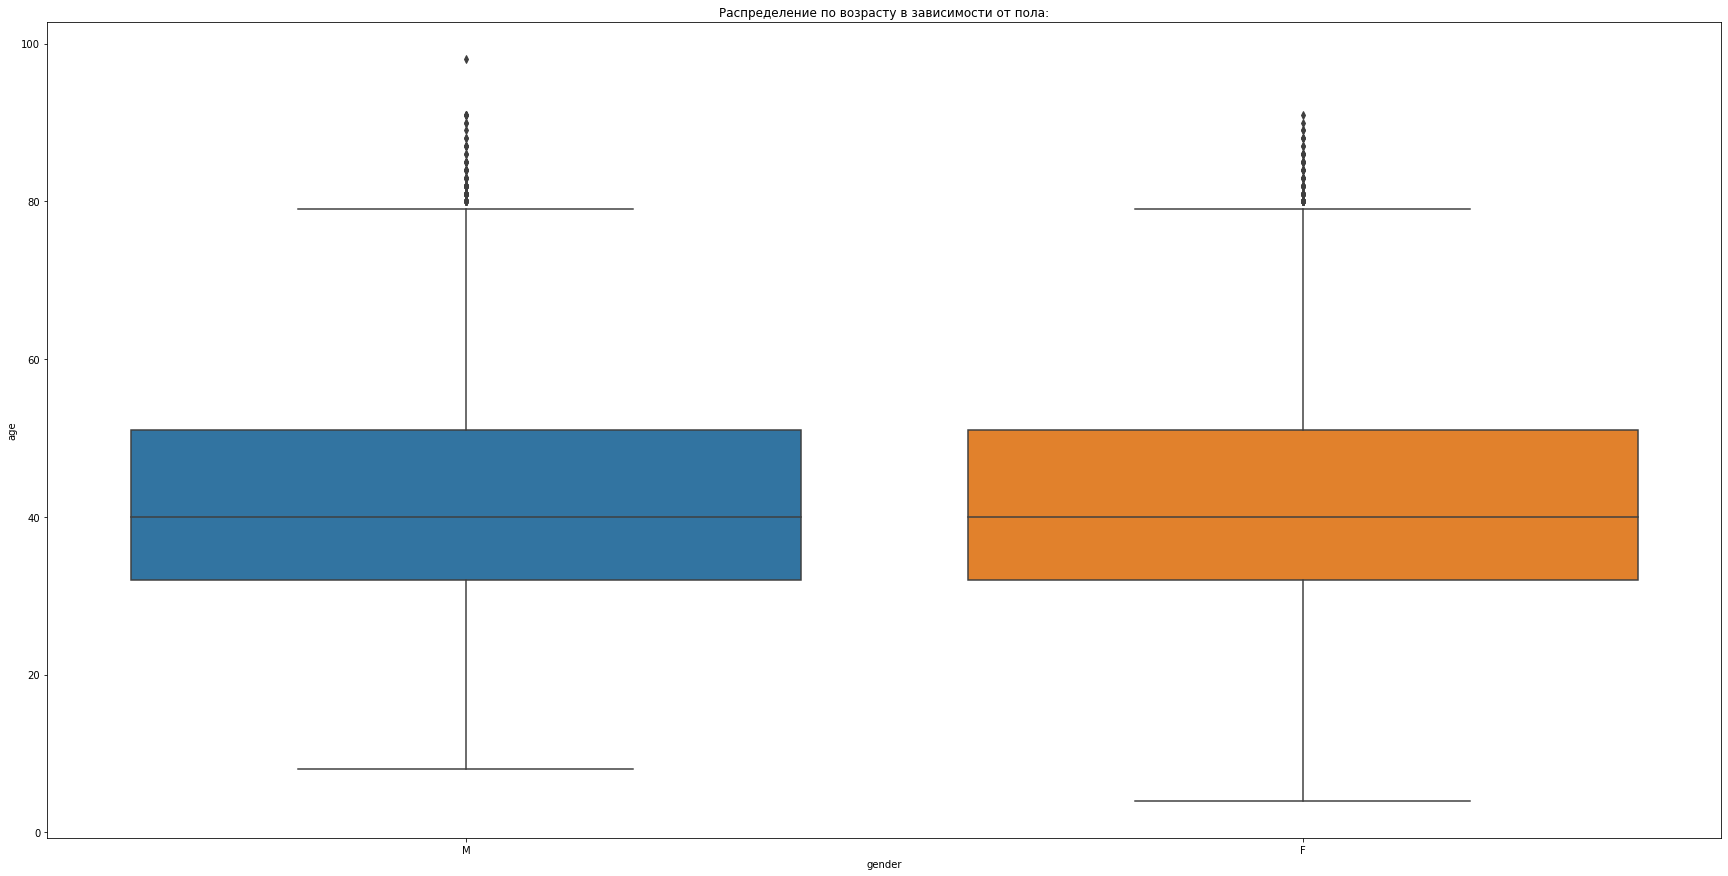

In [8]:
sns.boxplot(x='gender', y='age', data=df)
plt.title('Распределение по возрасту в зависимости от пола:')

Text(0.5, 1.0, 'Доходы и возраст:')

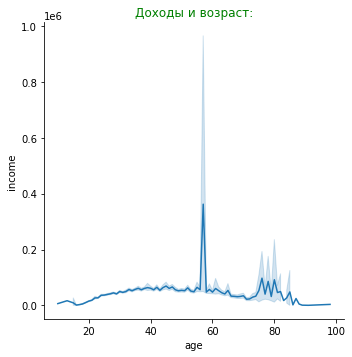

In [9]:
df = pd.read_csv('test_cluster.csv', encoding='cp1251', sep=';')
df_ml_balance_series = df.set_index('age')['ml_balance']
df_ml_balance_series.head()
sns.relplot(
    x = 'age',
    y = 'income',
    data=df.query("income > 0"),
    kind = 'line'
)
plt.title('Доходы и возраст:', color='g')

Text(0.5, 1.0, 'Сумма кредита от возраста:')

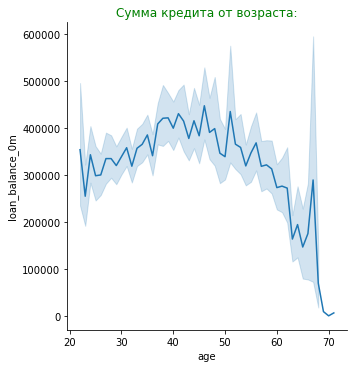

In [10]:
df = pd.read_csv('test_cluster.csv', encoding='cp1251', sep=';')

df_ipiteka = df[['age', 'loan_balance_0m']]
count_ipoteka = df_ipiteka.query('loan_balance_0m > 0')
sns.relplot(
    x = 'age',
    y = 'loan_balance_0m',
    data = count_ipoteka,
    kind = 'line'
)
plt.title('Сумма кредита от возраста:', color='g')

Text(0.5, 1.0, 'Возраст кредиторов:')

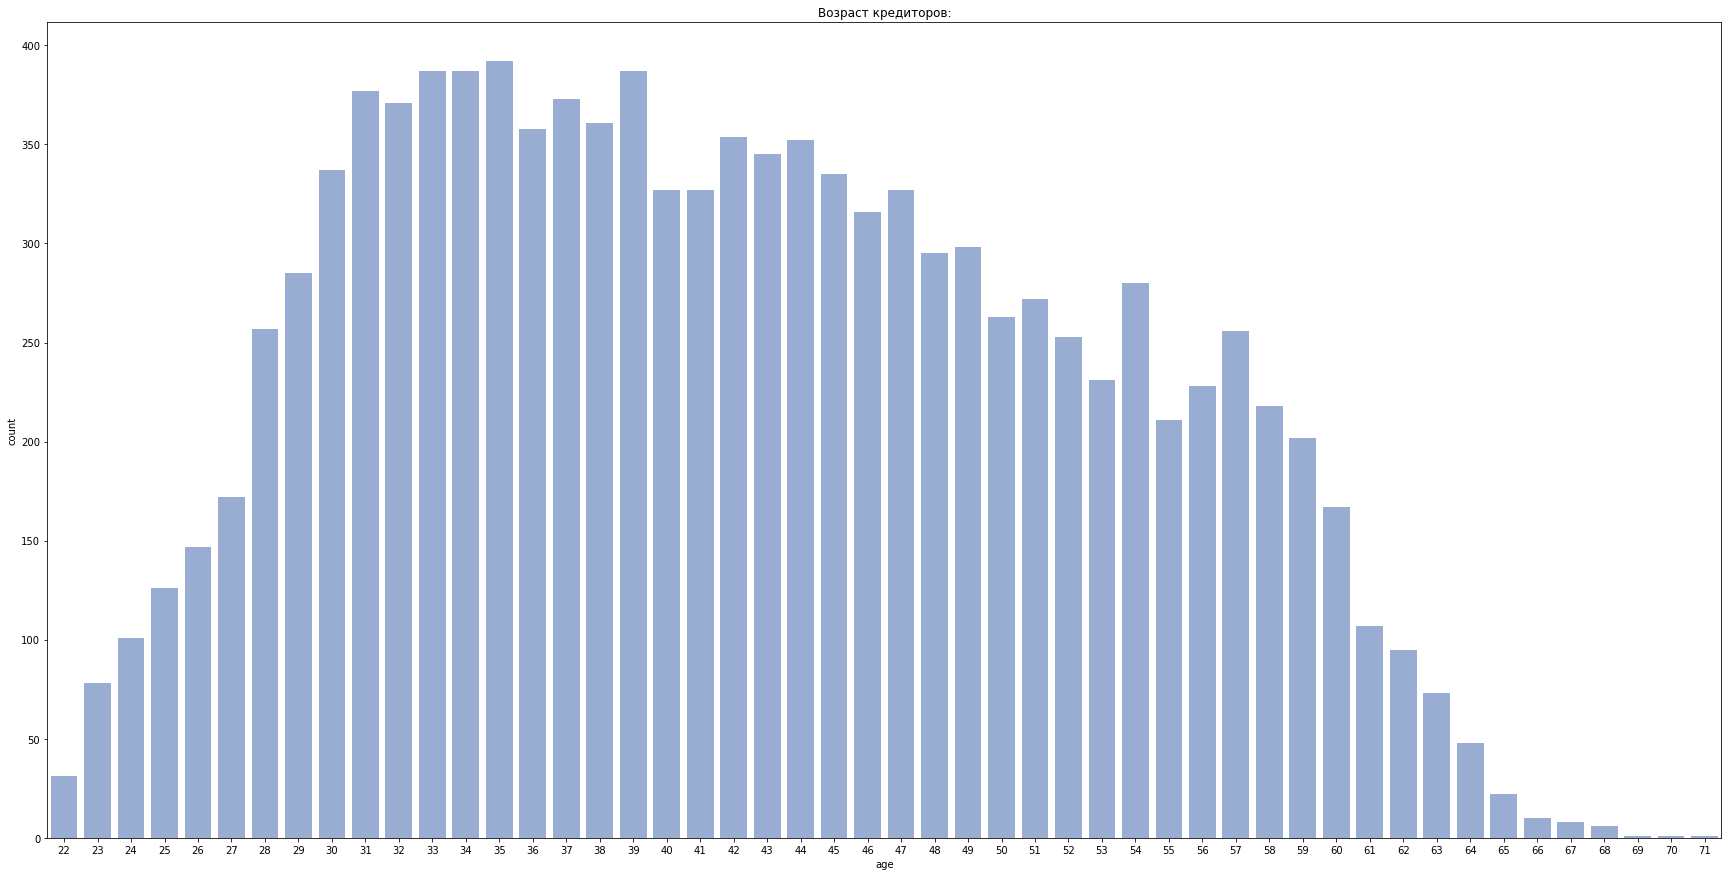

In [11]:
rcParams['figure.figsize'] = 30,15
df = pd.read_csv('test_cluster.csv', encoding='cp1251', sep=';')
df_ipiteka = df[['age', 'loan_balance_0m']]
amount_ipoteka = df_ipiteka.query('loan_balance_0m > 0')
sns.countplot(x='age', data = amount_ipoteka, palette = ['#8FAADC'])
plt.title('Возраст кредиторов:')